In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#数据格式化

datafile = open('Cr2O3-log.lammps', 'r', encoding='utf-8')
datas = datafile.readlines()
#print(type(datas))
datalist = []
for i in range(len(datas)-1):
    datas[i] = ' '.join(datas[i].split())
    datalist.append(datas[i])

#print(datalist)
    
datafile.close()



datafile = open('Cr2O3-log.txt', 'w')

data = '\n'.join(datalist)

datafile.write(data)

datafile.close()


In [24]:
contents = pd.read_csv('Cr2O3-log.txt', sep=' ')

star = int(input("起始行数："))

end = int(input("结束行数："))

contents = contents.iloc[star: end+1, :]

#contents = contents.drop(0)

contents.head()

起始行数：1000
结束行数：9000


,Step,Temp,PotEng,c_msd_all[4],c_msd_cr[4],c_msd_o[4],v_twopoint_all,v_twopoint_cr,v_twopoint_o,v_fitslope_all,v_fitslope_cr,v_fitslope_o
1000,1000000,301.67724,-29467.763,0.021670,0.021294,0.021867,0.000004,0.000004,0.000004,3.850914e-08,3.562025e-08,4.036512e-08
1001,1001000,309.41591,-29465.223,0.024236,0.023890,0.024433,0.000004,0.000004,0.000004,3.872340e-08,3.599772e-08,4.045316e-08
1002,1002000,312.46971,-29467.115,0.023131,0.023403,0.022911,0.000004,0.000004,0.000004,3.971250e-08,3.700583e-08,4.141690e-08
1003,1003000,294.39565,-29465.028,0.022058,0.022537,0.021709,0.000004,0.000004,0.000004,3.957433e-08,3.671105e-08,4.137444e-08
1004,1004000,289.60518,-29465.358,0.020940,0.020571,0.021074,0.000003,0.000003,0.000003,3.921770e-08,3.635017e-08,4.103735e-08


In [25]:
Step = contents['Step']/1000

Temp = contents['Temp']

PE = contents['PotEng']

msd_Cr2O3 = contents['c_msd_all[4]']

msd_Cr = contents['c_msd_cr[4]']

msd_O = contents['c_msd_o[4]']

v_twopoint_Cr2O3 = contents['v_twopoint_all']

v_twopoint_Cr = contents['v_twopoint_cr']

v_twopoint_O = contents['v_twopoint_o']

v_fitslope_Cr2O3 = contents['v_fitslope_all']

v_fitslope_Cr = contents['v_fitslope_cr']

v_fitslope_O = contents['v_fitslope_o']

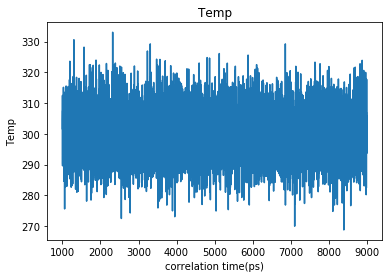

In [26]:
# Temp
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("Temp")
plt.plot(Step, Temp)
plt.title('Temp')

plt.show()

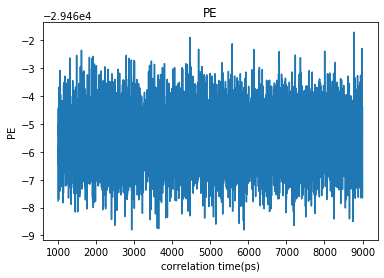

In [27]:
# Temp
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("PE")
plt.plot(Step, PE)
plt.title('PE')

plt.show()

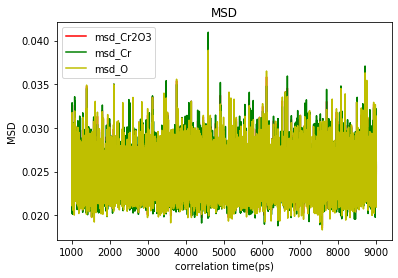

In [28]:
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("MSD")
plt.plot(Step, msd_Cr2O3, color='r', label='msd_Cr2O3')
plt.plot(Step, msd_Cr, color='g', label='msd_Cr')
plt.plot(Step, msd_O, color='y', label='msd_O')
plt.legend(loc="upper left")
plt.title('MSD')

plt.show()

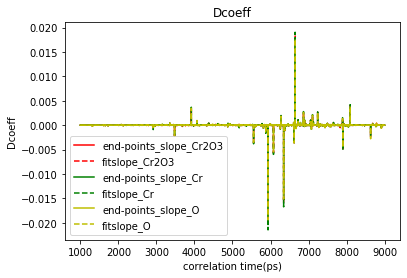

In [29]:
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("Dcoeff")
plt.plot(Step, v_twopoint_Cr2O3, color="r", linestyle='-', label='end-points_slope_Cr2O3')
plt.plot(Step, v_fitslope_Cr2O3, color="r", linestyle='--', label='fitslope_Cr2O3')
plt.plot(Step, v_twopoint_Cr, color="g", linestyle='-', label='end-points_slope_Cr')
plt.plot(Step, v_fitslope_Cr, color="g", linestyle='--', label='fitslope_Cr')
plt.plot(Step, v_twopoint_O, color="y", linestyle='-', label='end-points_slope_O')
plt.plot(Step, v_fitslope_O, color="y", linestyle='--', label='fitslope_O')
plt.legend(loc="lower left")
plt.title('Dcoeff')

plt.show()